In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles


In [12]:

def plot_outlier_detection(data, outliers, eps=0.3, min_samples=5):

    # Combine data and outliers
    data_with_outliers = np.vstack([data, outliers])
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(data_with_outliers)
    labels = dbscan.labels_
    
    # Identify outliers (points with label -1)
    outliers_indices = labels == -1
    non_outliers_indices = ~outliers_indices

    # Plot original data with outliers marked
    plt.figure(figsize=(12, 6))

    # Original Data with Outliers
    plt.subplot(1, 2, 1)
    plt.scatter(data_with_outliers[:, 0], data_with_outliers[:, 1], c='blue', marker='o', edgecolor='k', s=50)
    plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100, label='Outliers')
    plt.title('Original Data with Outliers')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    # DBSCAN Clustering with Outliers Marked
    plt.subplot(1, 2, 2)
    plt.scatter(data_with_outliers[non_outliers_indices, 0], data_with_outliers[non_outliers_indices, 1], c=labels[non_outliers_indices], cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(data_with_outliers[outliers_indices, 0], data_with_outliers[outliers_indices, 1], c='red', marker='x', edgecolor='k', s=100, label='Detected Outliers')
    plt.title(f'DBSCAN Clustering with Outliers {labels}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    plt.tight_layout()
    plt.show()




C:\Users\Upendra\AppData\Local\Temp\ipykernel_17880\2652537685.py:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100, label='Outliers')
C:\Users\Upendra\AppData\Local\Temp\ipykernel_17880\2652537685.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_with_outliers[outliers_indices, 0], data_with_outliers[outliers_indices, 1], c='red', marker='x', edgecolor='k', s=100, label='Detected Outliers')


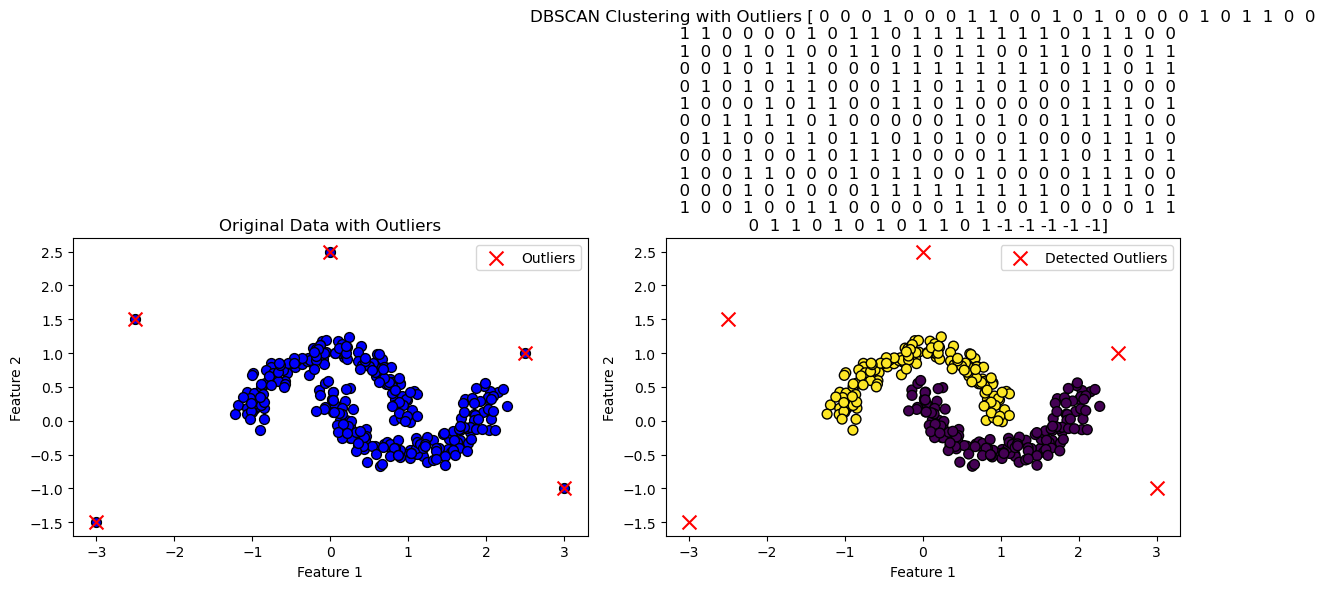

In [13]:
# Generate synthetic "moons" data
np.random.seed(42)
data, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Add outliers around the "moons"
outliers = np.array([[2.5, 1.0], [-2.5, 1.5], [3.0, -1.0], [-3.0, -1.5], [0, 2.5]])
# Generate additional random noise around the same range as the data 
noise = np.random.uniform(low=np.min(data, axis=0), high=np.max(data, axis=0), size=(50, data.shape[1]))

plot_outlier_detection(data, outliers, eps=0.2, min_samples=5)

C:\Users\Upendra\AppData\Local\Temp\ipykernel_17880\2652537685.py:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100, label='Outliers')
C:\Users\Upendra\AppData\Local\Temp\ipykernel_17880\2652537685.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_with_outliers[outliers_indices, 0], data_with_outliers[outliers_indices, 1], c='red', marker='x', edgecolor='k', s=100, label='Detected Outliers')


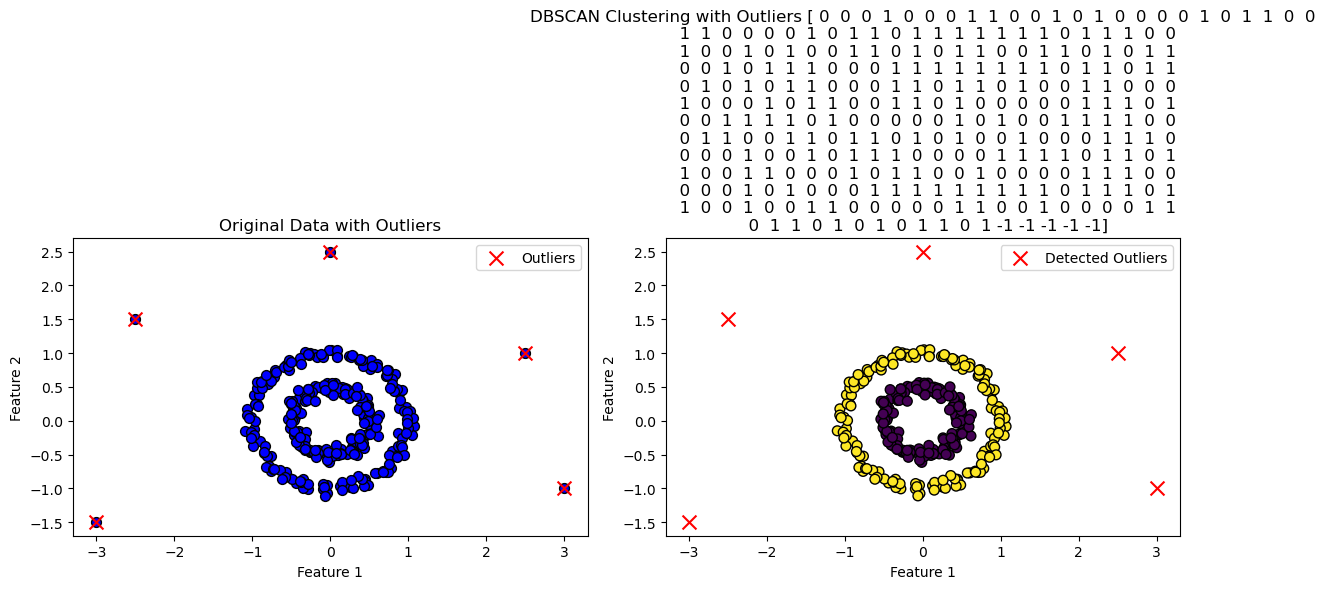

In [14]:
# Generate synthetic "moons" data
np.random.seed(42)
data, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

# Add outliers around the "moons"
outliers = np.array([[2.5, 1.0], [-2.5, 1.5], [3.0, -1.0], [-3.0, -1.5], [0, 2.5]])

plot_outlier_detection(data, outliers, eps=0.2, min_samples=5)

C:\Users\Upendra\AppData\Local\Temp\ipykernel_17880\2652537685.py:20: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', edgecolor='k', s=100, label='Outliers')
C:\Users\Upendra\AppData\Local\Temp\ipykernel_17880\2652537685.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(data_with_outliers[outliers_indices, 0], data_with_outliers[outliers_indices, 1], c='red', marker='x', edgecolor='k', s=100, label='Detected Outliers')


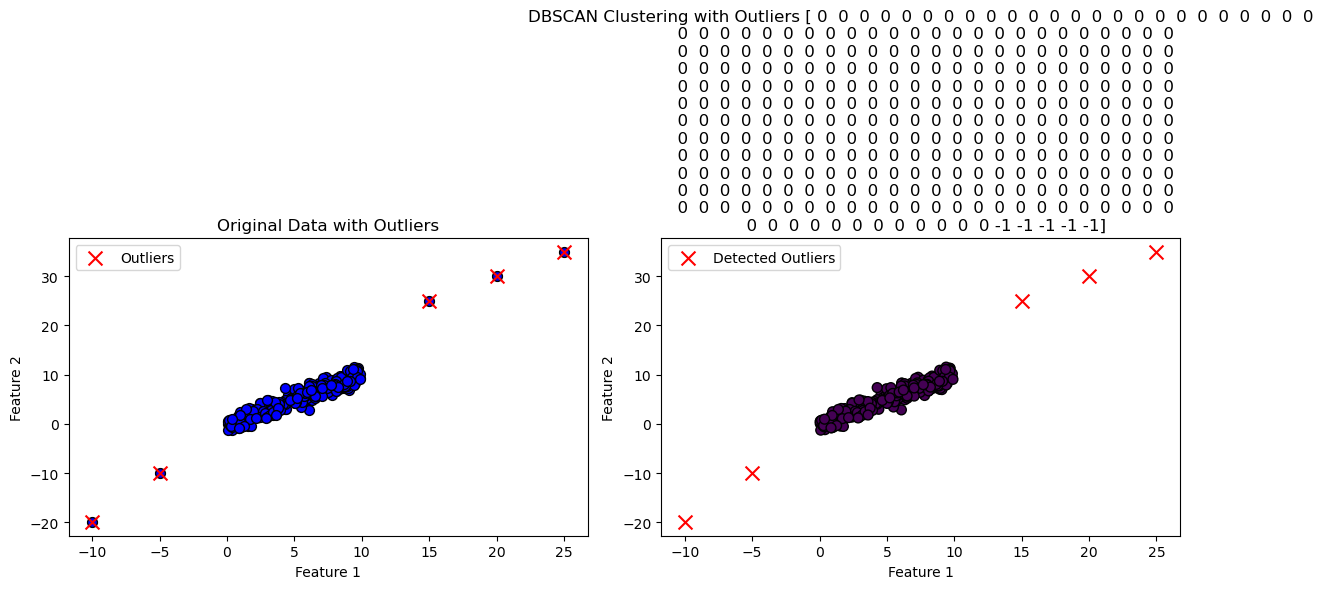

In [25]:


# Generate positively correlated data
np.random.seed(42)
x = np.random.rand(300) * 10
y = x + np.random.normal(0, 1, 300)  # y is positively correlated with x
positively_correlated_data = np.column_stack((x, y))

outliers = np.array([[15, 25], [-5, -10], [20, 30], [-10, -20], [25, 35]])
data_with_outliers = np.vstack([positively_correlated_data, outliers])

# Example usage for positively correlated data
plot_outlier_detection(positively_correlated_data, outliers, eps=1.0, min_samples=5)

